<a href="https://colab.research.google.com/github/arawsardni/Skin-Cancer-Classification---IS-LAB-Intern-Project/blob/main/skin_lesion_classification_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Dataset**

In [1]:
import kagglehub
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'skin-cancer-mnist-ham10000' dataset.
Path to dataset files: /kaggle/input/skin-cancer-mnist-ham10000


## Load Metadata

In [5]:
import pandas as pd

metadata = pd.read_csv("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv")
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


## Load Image

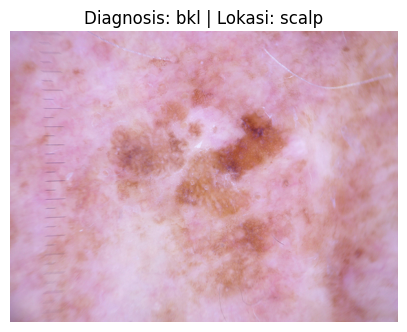

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# Ambil 1 baris contoh
sample = metadata.iloc[0]

# Path ke file gambar
img_id = sample['image_id']
img_path = f"/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/{img_id}.jpg"

# 3️⃣ Baca dan tampilkan gambar
img = Image.open(img_path)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title(f"Diagnosis: {sample['dx']} | Lokasi: {sample['localization']}")
plt.axis("off")
plt.show()

# **Preprocessing**

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
data_dir = '/kaggle/input/skin-cancer-mnist-ham10000'
dataset = datasets.ImageFolder(data_dir, transform=train_transforms)

In [ ]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [ ]:
val_dataset.dataset.transform = val_transforms

In [ ]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Jumlah total gambar: {len(dataset)}")
print(f"Jumlah data training: {len(train_dataset)}")
print(f"Jumlah data validasi: {len(val_dataset)}")
print(f"Kelas yang terdeteksi: {dataset.classes}")

Jumlah total gambar: 20030
Jumlah data training: 16024
Jumlah data validasi: 4006
Kelas yang terdeteksi: ['HAM10000_images_part_1', 'HAM10000_images_part_2', 'ham10000_images_part_1', 'ham10000_images_part_2']
